In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/KULIAH/SKRIPSI/DATASET/dataset_newLabelling2.xlsx')
df.head(3)

,Text,Id,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,Cluster
0,rt senilai rp miliar berhasil disita bareskrim...,1.461846e+18,"[rt, senilai, rp, miliar, berhasil, disita, ba...",<FreqDist with 17 samples and 17 outcomes>,"[senilai, rp, miliar, berhasil, disita, baresk...","[senilai, rp, miliar, berhasil, disita, baresk...","[nila, rp, miliar, hasil, sita, bareskrim, pol...",0
1,rt bagaikan mati satu tumbuh seribu pinjol ill...,1.461846e+18,"[rt, bagaikan, mati, satu, tumbuh, seribu, pin...",<FreqDist with 17 samples and 18 outcomes>,"[mati, tumbuh, seribu, pinjol, illegal, punah,...","[mati, tumbuh, seribu, pinjol, illegal, punah,...","[mati, tumbuh, ribu, pinjol, illegal, punah, p...",0
2,rt dittipideksus bareskrim polri akan mengenak...,1.461846e+18,"[rt, dittipideksus, bareskrim, polri, akan, me...",<FreqDist with 18 samples and 18 outcomes>,"[dittipideksus, bareskrim, polri, mengenakan, ...","[dittipideksus, bareskrim, polri, mengenakan, ...","[dittipideksus, bareskrim, polri, kena, wna, b...",0


In [ ]:
df.shape

(6907, 8)

In [ ]:
df.drop(['Id'], axis=1, inplace=True)

In [ ]:
df.head(3)

,Text,tweet_tokens,tweet_tokens_fdist,tweet_tokens_WSW,tweet_normalized,tweet_tokens_stemmed,Cluster
0,rt senilai rp miliar berhasil disita bareskrim...,"[rt, senilai, rp, miliar, berhasil, disita, ba...",<FreqDist with 17 samples and 17 outcomes>,"[senilai, rp, miliar, berhasil, disita, baresk...","[senilai, rp, miliar, berhasil, disita, baresk...","[nila, rp, miliar, hasil, sita, bareskrim, pol...",0
1,rt bagaikan mati satu tumbuh seribu pinjol ill...,"[rt, bagaikan, mati, satu, tumbuh, seribu, pin...",<FreqDist with 17 samples and 18 outcomes>,"[mati, tumbuh, seribu, pinjol, illegal, punah,...","[mati, tumbuh, seribu, pinjol, illegal, punah,...","[mati, tumbuh, ribu, pinjol, illegal, punah, p...",0
2,rt dittipideksus bareskrim polri akan mengenak...,"[rt, dittipideksus, bareskrim, polri, akan, me...",<FreqDist with 18 samples and 18 outcomes>,"[dittipideksus, bareskrim, polri, mengenakan, ...","[dittipideksus, bareskrim, polri, mengenakan, ...","[dittipideksus, bareskrim, polri, kena, wna, b...",0


In [ ]:
df.shape

(6907, 7)

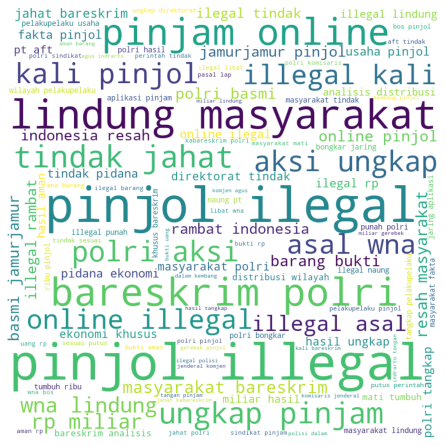

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords

comment_words = ''
stopwords = ''

for val in df['tweet_tokens_stemmed']:
  # typecaste each val to string
  val = str(val)

  # split the value
  tokens = val.split()

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
  
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color = "white", stopwords = stopwords,
                      min_font_size = 10).generate(comment_words)

plt.figure(figsize=(8,6), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

TF - IDF Pembobotan

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

vectorizer = CountVectorizer()
transformer = TfidfTransformer()

x = vectorizer.fit_transform(df.tweet_tokens_stemmed)
print(f"shape >> {x.toarray().shape}")
print("samples\n")
print(x.toarray()[0])

x = transformer.fit_transform(x)
print(f"\n\nshape >> {x.toarray().shape}")
print("samples\n")
print(x.toarray()[0])

X = x.toarray()
y = df.Cluster

shape >> (6907, 6220)
samples

[0 0 0 ... 0 0 0]


shape >> (6907, 6220)
samples

[0. 0. 0. ... 0. 0. 0.]


Train and Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label = train_test_split(X,y,test_size=0.3,random_state=42)

print("Train Data shape : ",train_data.shape)
print("Test Data shape : ",test_data.shape)
print("Train Label shape : ",train_label.shape)
print("Test Label shape : ",test_label.shape)

Train Data shape :  (4834, 6220)
Test Data shape :  (2073, 6220)
Train Label shape :  (4834,)
Test Label shape :  (2073,)


KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Applying k = 3, default Minkowski distance metrics
model = KNeighborsClassifier(n_neighbors=3)
# Training the classifier
model.fit(train_data, train_label)

KNeighborsClassifier(n_neighbors=3)

Confussion Matrix for Accuracy

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from matplotlib import pyplot

In [ ]:
# Testing the classifier
y_pred = model.predict(test_data)
print('Predicted', train_label)
print('Actual data', test_label)

Predicted 4657    0
2771    0
4162    0
1294    0
6457    0
       ..
3772    0
5191    0
5226    0
5390    0
860     0
Name: Cluster, Length: 4834, dtype: int64
Actual data 2464    0
994     0
3910    0
5709    0
5480    0
       ..
446     0
1743    0
6682    0
6365    0
3392    1
Name: Cluster, Length: 2073, dtype: int64


In [ ]:
print(accuracy_score(test_label, y_pred))

0.9961408586589484


In [ ]:
print(classification_report(test_label,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1682
           1       0.98      0.99      0.99       391

    accuracy                           1.00      2073
   macro avg       0.99      1.00      0.99      2073
weighted avg       1.00      1.00      1.00      2073



In [ ]:
print(confusion_matrix(test_label, y_pred))

[[1676    6]
 [   2  389]]


In [ ]:
cm = confusion_matrix(test_label, y_pred)

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

Classification Accuracy

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9961


Precision

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9964


Recall

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9988


Error Rate

In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0039
